<a href="https://www.kaggle.com/code/isissantoscosta/time-series-the-world-bank-global-health?scriptVersionId=208709668" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='top'></a>
Published on November 2, 2024 • Updated on November 20, 2024 • by [Ísis Santos Costa](https://www.linkedin.com/in/isis-santos-costa/)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy  as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<!-- 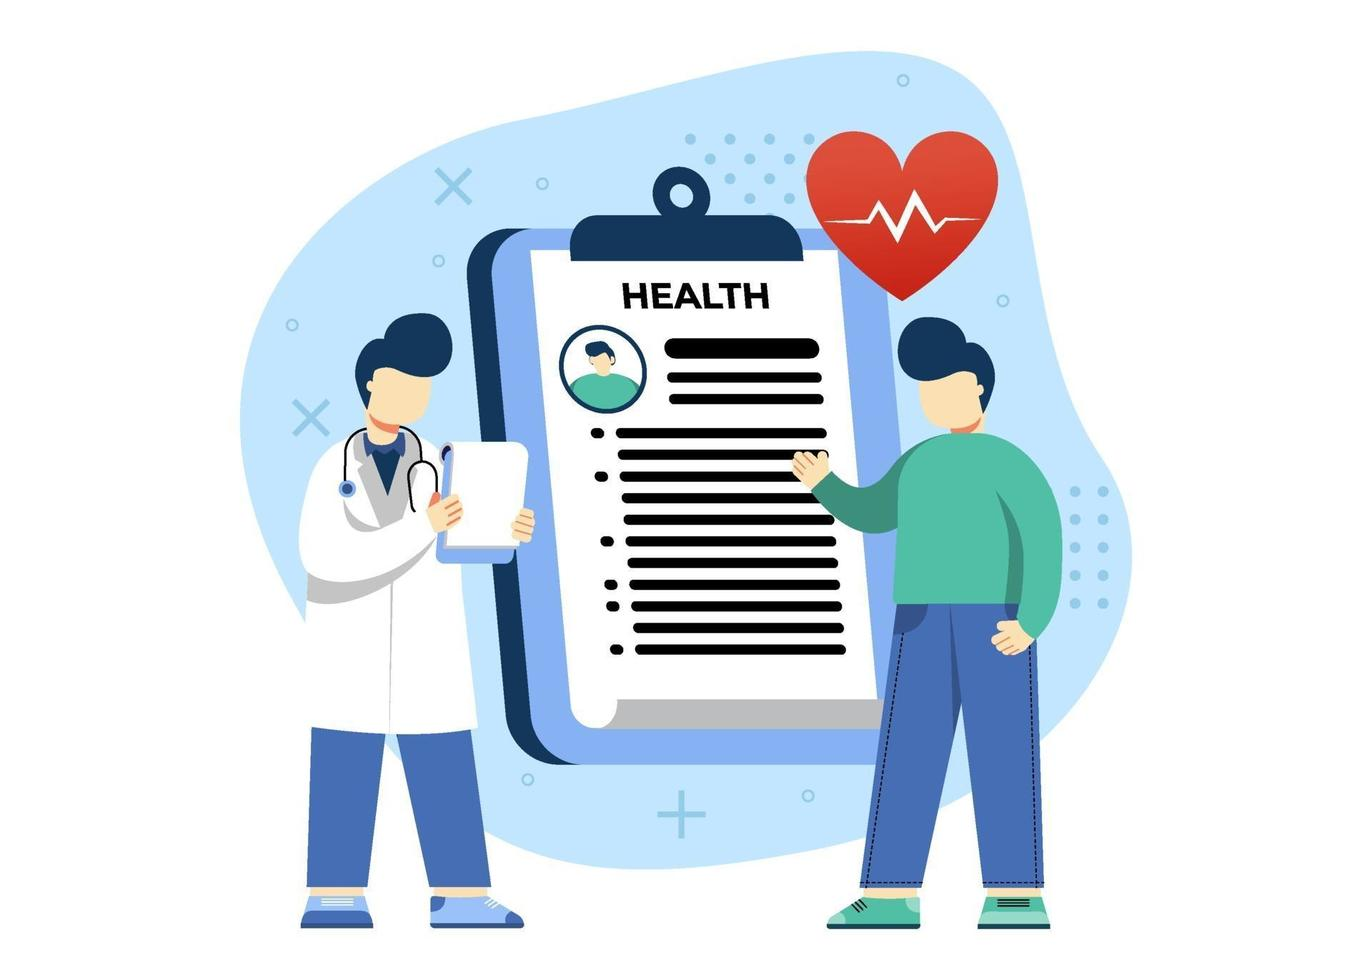   -->

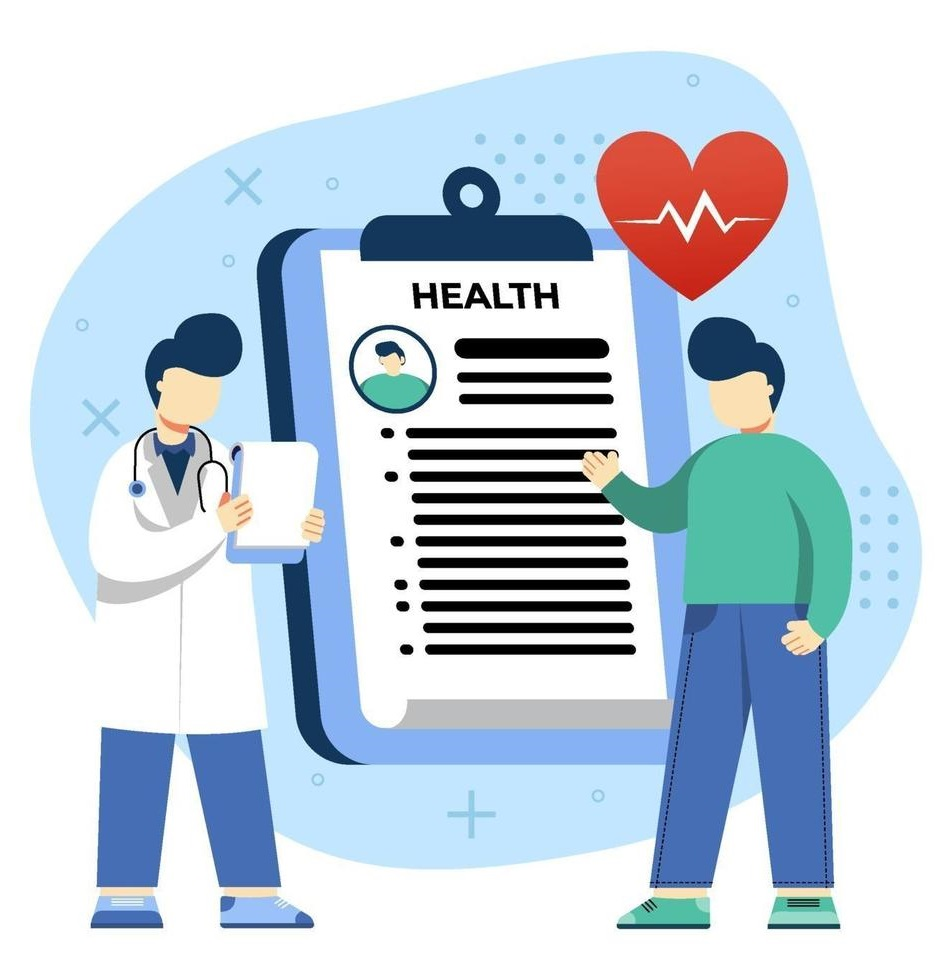

<figcaption>License-free illustration by <a href='https://pt.vecteezy.com/membros/imajin-noasking'>imajin.noasking</a> via <a href="https://pt.vecteezy.com/vetor-gratis/healthy">Vecteezy</a></figcaption>

<br><br><br>

<hr>

<a id="contents"></a>
<strong>Contents</strong>  
* [<strong>The theme</strong>: Health](#theme)
* [<strong>The focus</strong>: Overweight, Undernourishment](#focus)
* [<strong>Segments</strong>: High-income, Low-income](#segments)
* [<strong>The history so far</strong>: A look at the Time Series](#history)
* [<strong>The future</strong>: Forecasting](#forecast)

<hr>

<a id='theme'></a>

# <div style="background-color:#03002e; padding:18px; border-radius:8px; color:white; text-align:center; font-weight:regular; overflow:hidden"><strong>The theme • Health</strong></div>
<br>

> **<div style="font-size:26px;">What are some universal silent factors that may be hindering longevity globally?</div>**

<br>  
<br>  

Driven by this question, this notebook uses data from **Google BigQuery public datasets**:  

**[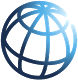 The World Bank: Global Health](https://console.cloud.google.com/marketplace/product/the-world-bank/global-health)**   


The chosen dataset provides a holistic view on global health and population trends, tracked through 425 indicators, from more than 200 countries, over more than four decades.  

The **hidden cell** below fetches the **whole list of indicators**. Out of these, a subset of candidate indicators is presented later, as well as the criterion for getting to a final list.  

The metrics chosen to be further explored here are **overweight** and **undernourishment** in **high versus low-income** regions, with trends on these shown and discussed in the report.

 

Warning: long list hidden below.
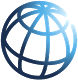

In [2]:
# Let's take a look at all indicators to later choose some

# Connecting to BigQuery
from google.cloud import bigquery
client = bigquery.Client()
client

# SQL code to fetch unique indicators, with their code, name, and count of records
query = '''
        SELECT
              indicator_code
            , indicator_name
            , COUNT(*) AS record_count
        FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
        GROUP BY ALL
        ORDER BY record_count DESC
        '''
# Fetching from BigQuery, with a set limit for data usage
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**1)
query_job   = client.query(query, job_config=safe_config)
df          = query_job.to_dataframe()

# The following setting makes the whole content of the cell readable (long indicator names)
pd.options.display.max_colwidth = 1000  # default = 50

# The following setting makes it possible to display all rows, to the 425 indicators 🔍
pd.set_option('display.max_rows', None) # default = 60
df

# Ref.:
# To break down the data horizontally, see:
# https://stackoverflow.com/questions/23891575/how-to-merge-two-dataframes-side-by-side

Using Kaggle's public dataset BigQuery integration.


,indicator_code,indicator_name,record_count
0,SP.POP.TOTL,"Population, total",15879
1,SP.RUR.TOTL.ZS,Rural population (% of total population),15790
2,SP.URB.TOTL.IN.ZS,Urban population (% of total population),15790
3,SP.RUR.TOTL,Rural population,15757
4,SP.URB.TOTL,Urban population,15757
5,SP.POP.GROW,Population growth (annual %),15617
6,SP.URB.GROW,Urban population growth (annual %),15498
7,SP.RUR.TOTL.ZG,Rural population growth (annual %),15007
8,SP.DYN.CBRT.IN,"Birth rate, crude (per 1,000 people)",14650
9,SP.DYN.CDRT.IN,"Death rate, crude (per 1,000 people)",14627


The following indicators stand out from the World Bank's Global Health dataset, for their universality:

* **Age dependency ratio (% of working-age population)**  
* **GNI per capita, Atlas method (current US$)**
* **Prevalence of overweight, female (% of female adults)**
* **Prevalence of overweight, male (% of male adults)**
* **Prevalence of overweight (% of adults)**
* **Physicians (per 1,000 people)**
* **Out-of-pocket expenditure (% of current health expenditure)**
* **Out-of-pocket expenditure per capita (current US\$)**  
* **Current health expenditure (% of GDP)** 
* **Current health expenditure per capita (current US\$)**  
* **Tuberculosis case detection rate (%, all forms)**  
* **Tuberculosis treatment success rate (% of new cases)**  
* **Prevalence of undernourishment (% of population)**
* **Number of people who are undernourished**
* **Age at first marriage, female**
* **Age at first marriage, male**
* **Vitamin A supplementation coverage rate (% of children ages 6-59 months)**
* **Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care expenditure (%)**
* **UHC service coverage index**
* **Consumption of iodized salt (% of households)**
* **Female headed households (% of households with a female head)**
* **Mortality rate attributed to household and ambient air pollution (per 100,000 population)**

[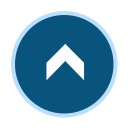](#contents)

<a id='focus'></a>

# <div style="background-color:#03002e; padding:18px; border-radius:8px; color:white; text-align:center; font-weight:regular; overflow:hidden"><strong>The focus • Overweight, Undernourishment</strong></div>
 
An article from **Preventive Medicine Reports** warns:  
<br>

> <div style="font-size:26px;">Globally, <strong>overweight/obesity</strong> is one of the key risk factors of non-communicable diseases.</div>  

<br>
<font size='1'>
<p style='line-height: 1.1;'>
    Reference: A.N.M. Shamsul Islam et al. <i>The global burden of overweight-obesity and its association with economic status, benefiting from STEPs survey of WHO member states: A meta-analysis</i>. <b>Preventive Medicine Reports</b>, Volume 46, October 2024, 102882. <a heref='https://doi.org/10.1016/j.pmedr.2024.102882'>https://doi.org/10.1016/j.pmedr.2024.102882</a>
    </font>
</p>

---

Considering the article, let's focus on **overweight**, and on the other side of the burden of [malnutrition](https://www.who.int/news-room/fact-sheets/detail/malnutrition), **undernourishment**:  
* **Prevalence of overweight, female (% of female adults)**
* **Prevalence of overweight, male (% of male adults)**
* **Prevalence of overweight (% of adults)**
* **Prevalence of undernourishment (% of population)**
* **Number of people who are undernourished**

This is a nice list, fairly manageable: five metrics to focus on.

Let's then extract **time series data** for these indicators, fetching them from the source:  
<font size='1'>
(as EDA showed too many occurrences of the value 1, apparently in place of null values, this value was filtered out) 
</font>
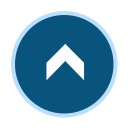

In [3]:
# But first, let's set back a limit to the number of displayed rows:
pd.set_option('display.max_rows', 60) # default = 60  # pd.options.display.max_rows

# SQL code
query = """
        SELECT * 
        FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
        WHERE TRUE
          AND indicator_name IN (   'Prevalence of overweight, female (% of female adults)'
                                  , 'Prevalence of overweight, male (% of male adults)'
                                  , 'Prevalence of overweight (% of adults)'
                                  , 'Prevalence of undernourishment (% of population)'
                                  , 'Number of people who are undernourished')
          AND value <> 1
        # ORDER BY
        #     CASE
        #         WHEN indicator_name LIKE 'Prevalence of overweight%' THEN 1
        #         WHEN indicator_name LIKE 'Number of people who are%' THEN 2
        #         ELSE 3 END
        #     , indicator_name, country_name, year
        """

# Fetching data from BigQuery, with a limited amount to be billed
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**1)
query_job   = client.query(query, job_config=safe_config)
df          = query_job.to_dataframe()

# Displaying
df

,country_name,country_code,indicator_name,indicator_code,value,year
0,Canada,CAN,"Prevalence of overweight, female (% of female adults)",SH.STA.OWAD.FE.ZS,57.5,2014
1,Chad,TCD,"Prevalence of overweight, female (% of female adults)",SH.STA.OWAD.FE.ZS,12.2,1981
2,Chile,CHL,"Prevalence of overweight, female (% of female adults)",SH.STA.OWAD.FE.ZS,47.5,1984
3,Chile,CHL,"Prevalence of overweight, female (% of female adults)",SH.STA.OWAD.FE.ZS,56.4,2004
4,Chile,CHL,"Prevalence of overweight, female (% of female adults)",SH.STA.OWAD.FE.ZS,58.2,2008
...,...,...,...,...,...,...
30479,Belize,BLZ,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,7.7,2015
30480,Brazil,BRA,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,2.5,2018
30481,Cameroon,CMR,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,15.9,2005
30482,Uruguay,URY,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,3.8,2004


Considering the multiple regions for which data is available, the subset of five indicators still results in a faily long list of records, and a in high number of time series.

The **next section** focuses on **choosing specific regions**, so that the scope for the time series analysis to be performed here is reduced.

[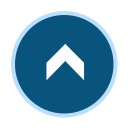](#contents)

<a id='segments'></a>

# <div style="background-color:#03002e; padding:18px; border-radius:8px; color:white; text-align:center; font-weight:regular; overflow:hidden"><strong>Segments • High-income, Low-income</strong></div>

Let's peek into `country_name` unique values in the dataset:

In [4]:
# But first, let't make it possible to print all rows again:
pd.set_option('display.max_rows', None) # default = 60

regions = df[['country_name']].drop_duplicates(subset='country_name').sort_values(by='country_name').reset_index(drop=True)
insert_rows = 4
regions = regions.reindex(index = range(0, insert_rows + len(regions))) 

regions_display =                                                                                                      \
                   regions[  0:30 ].reset_index(drop=True)                                                             \
            .merge(regions[ 30:60 ].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_1', '_2'])  \
            .merge(regions[ 60:90 ].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_2', '_3'])  \
            .merge(regions[ 90:120].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_3', '_4'])  \
            .merge(regions[120:150].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_4', '_5'])  \
            .merge(regions[150:180].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_5', '_6'])  \
            .merge(regions[180:210].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_6', '_7'])  \
            .merge(regions[210:240].reset_index(drop=True), left_index=True, right_index=True, suffixes=['_7', '_8'])
    
regions_display

,country_name_1,country_name_2,country_name_3,country_name_4,country_name_5,country_name_6,country_name_7,country_name_8
0,Afghanistan,Burundi,"Egypt, Arab Rep.",High income,Lebanon,Myanmar,Russian Federation,Syrian Arab Republic
1,Africa Eastern and Southern,Cabo Verde,El Salvador,Honduras,Lesotho,Namibia,Rwanda,Tajikistan
2,Africa Western and Central,Cambodia,Equatorial Guinea,"Hong Kong SAR, China",Liberia,Nauru,Samoa,Tanzania
3,Albania,Cameroon,Eritrea,Hungary,Libya,Nepal,Sao Tome and Principe,Thailand
4,Algeria,Canada,Estonia,IDA & IBRD total,Lithuania,Netherlands,Saudi Arabia,Timor-Leste
5,Andorra,Caribbean small states,Eswatini,Iceland,Low & middle income,New Caledonia,Senegal,Togo
6,Angola,Central African Republic,Ethiopia,India,Low income,New Zealand,Serbia,Tonga
7,Antigua and Barbuda,Central Europe and the Baltics,Euro area,Indonesia,Lower middle income,Nicaragua,Seychelles,Trinidad and Tobago
8,Arab World,Chad,Europe & Central Asia,"Iran, Islamic Rep.",Luxembourg,Niger,Sierra Leone,Tunisia
9,Argentina,Chile,Europe & Central Asia (IDA & IBRD countries),Iraq,"Macao SAR, China",Nigeria,Singapore,Turkey


Lots of regions!  
Two of them stand out as being a pair of extremes, good for comparisons:
* **High-income**
* **Low-income**

[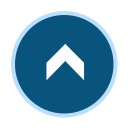](#contents)

<a id='history'></a>

# <div style="background-color:#03002e; padding:18px; border-radius:8px; color:white; text-align:center; font-weight:regular; overflow:hidden"><strong>The history so far • A look at the Time Series</strong></div>

Horizontally organizing the progress on each metric results in the table below:

In [5]:
# Bringing back safe display:
pd.set_option('display.max_rows', 60) # default = 60

# Relaxing the max_cols limit:
pd.set_option('display.max_columns', None) # default = 20

# Filtering conditions • indicators
overweight_female    = df['indicator_name']=='Prevalence of overweight, female (% of female adults)'
overweight_male      = df['indicator_name']=='Prevalence of overweight, male (% of male adults)'
overweight           = df['indicator_name']=='Prevalence of overweight (% of adults)'
undernourishment_pct = df['indicator_name']=='Prevalence of undernourishment (% of population)'
undernourishment_cnt = df['indicator_name']=='Number of people who are undernourished'

# Filtering conditions • regions
hi = df['country_name']=='High income'
li = df['country_name']== 'Low income'

# Sorting for columns
cols = ['year', 'value', 'indicator_name', 'indicator_code', 'country_name', 'country_code']

# Filtering and grooming
overweight_female_hi    = df[hi & overweight_female   ][cols].set_index('year').sort_index()
overweight_male_hi      = df[hi & overweight_male     ][cols].set_index('year').sort_index()
overweight_hi           = df[hi & overweight          ][cols].set_index('year').sort_index()
undernourishment_pct_hi = df[hi & undernourishment_pct][cols].set_index('year').sort_index()
undernourishment_cnt_hi = df[hi & undernourishment_cnt][cols].set_index('year').sort_index()

overweight_female_li    = df[li & overweight_female   ][cols].set_index('year').sort_index()
overweight_male_li      = df[li & overweight_male     ][cols].set_index('year').sort_index()
overweight_li           = df[li & overweight          ][cols].set_index('year').sort_index()
undernourishment_pct_li = df[li & undernourishment_pct][cols].set_index('year').sort_index()
undernourishment_cnt_li = df[li & undernourishment_cnt][cols].set_index('year').sort_index()

# Getting our time series
ts_overweight_female_hi    = overweight_female_hi   [['value']]
ts_overweight_male_hi      = overweight_male_hi     [['value']]
ts_overweight_hi           = overweight_hi          [['value']]
ts_undernourishment_pct_hi = undernourishment_pct_hi[['value']]
ts_undernourishment_cnt_hi = undernourishment_cnt_hi[['value']]

ts_overweight_female_li    = overweight_female_li   [['value']]
ts_overweight_male_li      = overweight_male_li     [['value']]
ts_overweight_li           = overweight_li          [['value']]
ts_undernourishment_pct_li = undernourishment_pct_li[['value']]
ts_undernourishment_cnt_li = undernourishment_cnt_li[['value']]

ts = pd.concat([
             ts_overweight_female_hi.T
           , ts_overweight_female_li.T
           
           , ts_overweight_male_hi.T
           , ts_overweight_male_li.T
           
           , ts_overweight_hi.T
           , ts_overweight_li.T
           
           , ts_undernourishment_pct_hi.T
           , ts_undernourishment_pct_li.T
           
           , ts_undernourishment_cnt_hi.T
           , ts_undernourishment_cnt_li.T
           
          ])

ts.index = [
             'ts_overweight_female_hi'
           , 'ts_overweight_female_li'
           
           , 'ts_overweight_male_hi'
           , 'ts_overweight_male_li'
           
           , 'ts_overweight_hi'
           , 'ts_overweight_li'
           
           , 'ts_undernourishment_pct_hi'
           , 'ts_undernourishment_pct_li'
           
           , 'ts_undernourishment_cnt_hi'
           , 'ts_undernourishment_cnt_li']

ts

year,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ts_overweight_female_hi,32.841962,33.301703,33.761588,34.177871,34.636440,35.073145,35.481049,35.936888,36.367196,36.800565,37.257084,37.696657,38.143600,38.592075,39.033199,39.479701,39.911866,40.328822,40.798053,41.277365,41.780364,42.252535,42.741500,43.210613,43.677301,44.154648,44.620502,45.093489,45.529021,46.012210,46.493122,46.956226,47.408022,47.882921,48.347119,48.794971,49.265119,49.698989,50.150181,50.579786,50.993370,51.437806,NaN,NaN,NaN
ts_overweight_female_li,12.350369,12.700714,13.086413,13.475911,13.854720,14.226535,14.633797,15.058674,15.487704,15.908392,16.362515,16.807210,17.266417,17.715179,18.168111,18.642851,19.115357,19.595960,20.050710,20.540019,21.027163,21.534756,22.068935,22.591231,23.136372,23.683783,24.225886,24.769914,25.314287,25.882872,26.481375,27.131104,27.759733,28.419062,29.076066,29.715229,30.301812,30.889856,31.459969,32.042022,32.629501,33.259252,NaN,NaN,NaN
ts_overweight_male_hi,38.195005,38.803328,39.428797,40.068971,40.647619,41.278847,41.893567,42.515816,43.130016,43.739344,44.366064,44.961198,45.580656,46.187998,46.771177,47.405913,47.985763,48.577293,49.202898,49.798865,50.450562,51.068030,51.689687,52.308439,52.927682,53.510918,54.118415,54.728084,55.325210,55.961228,56.568787,57.178593,57.749227,58.333230,58.923355,59.497958,60.053774,60.594237,61.148809,61.686883,62.225006,62.737207,NaN,NaN,NaN
ts_overweight_male_li,7.677645,7.885988,8.141804,8.362998,8.584421,8.832216,9.076882,9.371887,9.641030,9.906291,10.202367,10.485877,10.794672,11.096511,11.399970,11.704652,12.049112,12.377700,12.717545,13.037638,13.361577,13.708044,14.047273,14.371904,14.704542,15.036661,15.379237,15.692338,16.043130,16.388201,16.745101,17.155596,17.555570,17.945095,18.352877,18.711006,19.069083,19.379755,19.695396,20.027277,20.363241,20.742145,NaN,NaN,NaN
ts_overweight_hi,35.575209,36.100080,36.613964,37.146097,37.670776,38.188128,38.725373,39.240407,39.777546,40.311122,40.841029,41.366978,41.892063,42.404689,42.909944,43.440700,43.986439,44.469959,45.026602,45.569026,46.136544,46.698299,47.219098,47.786190,48.335001,48.855626,49.383267,49.924387,50.472189,51.012691,51.540621,52.100356,52.623195,53.171958,53.681174,54.217551,54.710900,55.213222,55.732951,56.205168,56.688179,57.181590,NaN,NaN,NaN
ts_overweight_li,10.183699,10.469427,10.779271,11.088542,11.382603,11.710310,12.042178,12.401122,12.751983,13.107027,13.470873,13.855004,14.235802,14.604962,15.006070,15.388170,15.796454,16.182085,16.591983,16.973199,17.375954,17.787899,18.243206,18.673591,19.102890,19.563087,19.980628,20.432618,20.880910,21.316079,21.809935,22.323608,22.851802,23.388568,23.923284,24.411535,24.891975,25.346261,25.791274,26.247199,26.729129,27.215254,NaN,NaN,NaN
ts_undernourishment_pct_hi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.675549,2.679352,2.682735,2.686105,2.680764,2.681746,2.695705,2.714250,2.728232,2.732986,2.687468,2.668336,2.638008,2.625856,2.613749,2.618048,2.611173,2.611479,2.618126
ts_undernourishment_pct_li,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.816518,35.764827,34.856638,33.784275,32.959987,32.026566,31.279910,30.517303,29.264973,28.823927,28.535565,29.027281,27.983422,27.315388,26.818056,26.988668,27.356119,27.499293,28.655027
ts_undernourishment_cnt_hi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts_undernourishment_cnt_li,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `ts` table reveals that the undernourishment count data seems off, so let's drop it, and see a chart for the other ones. The chart below shows the progress of the chosen indicators:

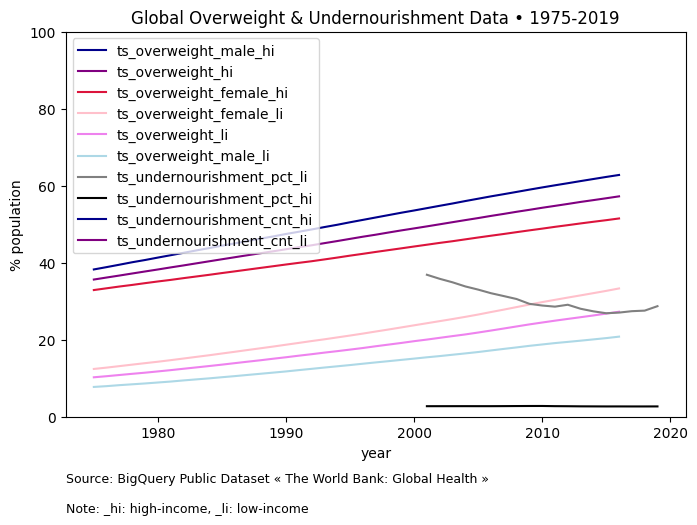

In [6]:
# Sorting the ts for more convenient reading of the chart legend
ts_overweight       = ts.iloc[:-4].sort_values(by=2001, ascending=False)
ts_undernourishment = ts.iloc[-4:].sort_values(by=2001, ascending=False)
ts = pd.concat([ts_overweight, ts_undernourishment])

# Dropping the last 2 rows, undernourishment count in high-income, and low-income regions
# ts = ts[:-2]

# Importing library, drawing chart
from matplotlib import pyplot as plt

colors     = ['darkblue', 'purple', 'crimson', 'pink', 'violet', 'lightblue', 'gray', 'black' ]
linestyles = ['-'       , '--'    , '-'      , '--'  , '-'     , '--'       , '-'   , '--'    ]
markers    = ['+'       , '+'     , '+'      , ''    , ''      , ''         , ''    , '+'     ]

ax = ts.T.plot(figsize=(8, 5), color=colors, linestyle='-', marker='')

ax.set_title('Global Overweight & Undernourishment Data • 1975-2019')
ax.set_ylabel('% population')
ax.set_ylim(0,100)

ax.annotate('Source: BigQuery Public Dataset « The World Bank: Global Health »' + '\n\n' + 'Note: _hi: high-income, _li: low-income',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax.legend(loc='upper left')  # ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

# Ref.:
# Footnote below the chart: https://swdevnotes.com/python/2020/matplotlib_add_footnote/
# https://sparkbyexamples.com/pandas/pandas-drop-last-n-rows-from-dataframe/

The following information can be derived from the table and chart:  

Overall
* **Overweight has steadily grown**
* **Undernourishment in low-income** regions consistently receded for a long period, but **took a resumption in the latest years**

In numbers 
* In **high-income** regions, **overweight increased by 60%**
* In **low-income** regions, **overweight increased by more than 160%**, getting to the same level as undernourishment
* **Undernourishment in low-income** regions ranged from **27% to 37%** in the period
* **Undernourishment in high-income**  regions kept stable, at levels below **3%**

Male _vs_ female:
* **Overweight varies considerably more for men** than for women, in the comparison between **high vs low-income** regions

[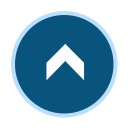](#contents)

<a id='forecast'></a>

# <div style="background-color:#03002e; padding:18px; border-radius:8px; color:white; text-align:center; font-weight:regular; overflow:hidden"><strong>The future • Forecasting</strong></div>

Out of the multiple plots seen in the chart above, two of them are particularly embracing, giving insight into **the most critical public health issues** tracked in the metrics considered in this report:

* **`ts_overweight_hi`**, informing on overall overweight in high-income regions
* **`ts_undernourishment_pct_li`**, informing on undernourishment in low-income regions

Let's thus take these two time series for an in-depth analysis, first validating a forecasting model for them, and then aplying it in profiling the expected future values.

### Validation: fitting a model

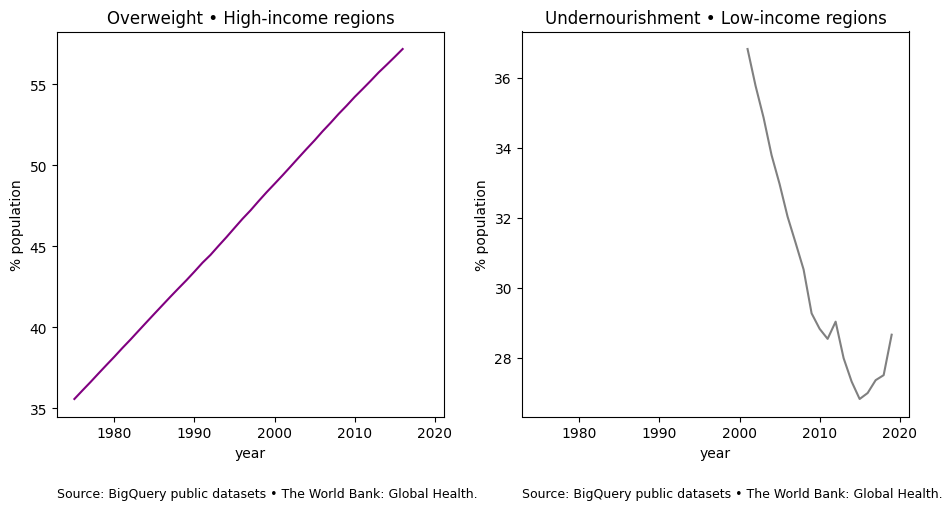

In [7]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(11, 5))

# # Super title
# plt.suptitle('The World Bank: Global Health Data', fontsize=16)

# Chart 1 • Overweight in high-income regions
ax1.set_title('Overweight • High-income regions')
ax1.set_xlabel('year')
ax1.set_ylabel('% population')
ax1.plot(ts_overweight_hi, color='purple')

ax1.annotate('Source: BigQuery public datasets • The World Bank: Global Health.',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

# Chart 2 • Undernourishment in low-income regions
ax2.set_title('Undernourishment • Low-income regions')
ax2.set_xlabel('year')
ax2.set_ylabel('% population')
ax2.plot(ts_undernourishment_pct_li, color='gray')

ax2.annotate('Source: BigQuery public datasets • The World Bank: Global Health.',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

plt.show()

We see a linear trend for overweight, easier to derive reasonable future values from. For undernourishment, on the other hand, there is a change in pattern making it more challenging to model.  

The method of choice applied below is the Exponential Smoothing (ES), a classic, robust approach.  

As the time series studied here have one record per year, seasonality is not observed. Accordingly, the applicable ES method is the **Holt Exponential Smoothing (HES)**, which focuses on capturing trends.

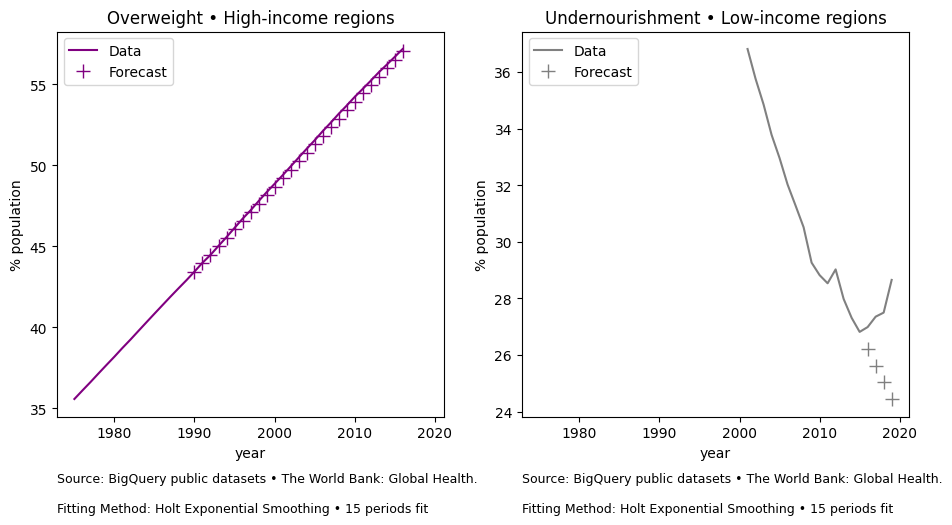

In [8]:
# HES • Holt Exponential Smoothing
from statsmodels.tsa.api import Holt

# Total periods, and periods used in fitting the model (years, in the case)
N = len(ts_overweight_hi)  # Total periods observed
k = 15                     # Periods fit

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(11, 5))

# # Super title
# plt.suptitle('The World Bank: Global Health Data • 15 periods fit', fontsize=16)

# Fit model to first k observations • OVERWEIGHT HIGH-INCOME ++++++++++++++++++++++++++++++++++++++++++++
X = list(ts_overweight_hi[:k]['value'])
hes_model = Holt(X).fit()
# print('ts_overweight_hi:' + '\n')
# print(hes_model.summary())

# Forecast the last N-k periods
hes_forecast = hes_model.forecast(N-k)

# Bring the forecast to the Time Series years
last_observed_year = max(ts_overweight_hi.index)
df_hes_fcst_1 = pd.DataFrame(hes_forecast, range(1 + last_observed_year-(N-k), 1 + last_observed_year))
df_hes_fcst_1.T

# CHART 1 • Overweight in high-income regions
ax1.set_title('Overweight • High-income regions')
ax1.set_xlabel('year')
ax1.set_ylabel('% population')
ax1.plot(ts_overweight_hi  , color='purple'               , label='Data'    )
ax1.plot(df_hes_fcst_1, '+', color='purple', markersize=10, label='Forecast')

ax1.annotate('Source: BigQuery public datasets • The World Bank: Global Health.' + '\n\n' + \
             'Fitting Method: Holt Exponential Smoothing' + ' • ' + str(k) + ' periods fit',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax1.legend()


# Fit model to first k observations • UNDERNOURISHMENT LOW-INCOME ++++++++++++++++++++++++++++++++++++++++++++
X = list(ts_undernourishment_pct_li[:k]['value'])
hes_model = Holt(X).fit()
# print('\nts_undernourishment_pct_li:' + '\n')
# print(hes_model.summary())

# Forecast the last N-k periods
N = len(ts_undernourishment_pct_li)
hes_forecast = hes_model.forecast(N-k)

# Bring the forecast to the Time Series years
last_observed_year = max(ts_undernourishment_pct_li.index)
df_hes_fcst_2 = pd.DataFrame(hes_forecast, range(1 + last_observed_year-(N-k), 1 + last_observed_year))
df_hes_fcst_2.T

# CHART 2 • Undernourishment in low-income regions
ax2.set_title('Undernourishment • Low-income regions')
ax2.set_xlabel('year')
ax2.set_ylabel('% population')
ax2.plot(ts_undernourishment_pct_li, color='gray'               , label='Data'    )
ax2.plot(df_hes_fcst_2, '+'        , color='gray', markersize=10, label='Forecast')

ax2.annotate('Source: BigQuery public datasets • The World Bank: Global Health.' + '\n\n' + \
             'Fitting Method: Holt Exponential Smoothing' + ' • ' + str(k) + ' periods fit',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax2.legend(loc='upper left')

plt.show()

# Ref.:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.Holt.html
# II 02:06:29

As expected, the fitting for overweight is well behaved. 

For undernourishment, a fitting period of 15 years ends before the drastic change in trend in the last years, not enabling the model to capture it.  

Let's then adjust the fitting length to 12 periods, feeding some points from the new trend into the model, so that it can capture it.

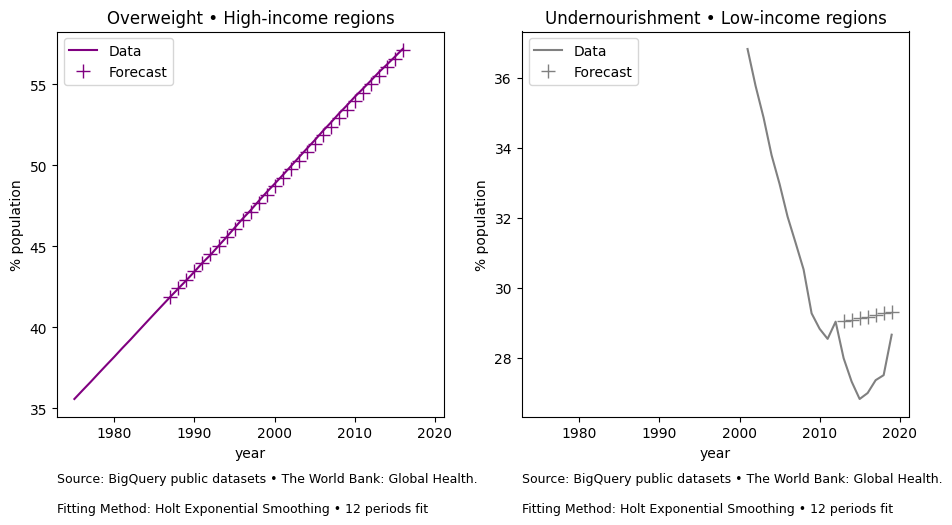

In [9]:
# HES • Holt Exponential Smoothing
from statsmodels.tsa.api import Holt

# Total periods, and periods used in fitting the model (years, in the case)
N = len(ts_overweight_hi)  # Total periods observed
k = 12                     # Periods fit

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(11, 5))

# # Super title
# plt.suptitle('The World Bank: Global Health Data • 12 periods fit', fontsize=16)

# Fit model to first k observations • OVERWEIGHT HIGH-INCOME ++++++++++++++++++++++++++++++++++++++++++++
X = list(ts_overweight_hi[:k]['value'])
hes_model = Holt(X).fit()
# print('ts_overweight_hi:' + '\n')
# print(hes_model.summary())

# Forecast the last N-k periods
hes_forecast = hes_model.forecast(N-k)

# Bring the forecast to the Time Series years
last_observed_year = max(ts_overweight_hi.index)
df_hes_fcst_1 = pd.DataFrame(hes_forecast, range(1 + last_observed_year-(N-k), 1 + last_observed_year))
df_hes_fcst_1.T

# Calculate average and std deviation (for upper and lower limits in the final forecast)
ho_actuals_1 = ts_overweight_hi[ts_overweight_hi.index.isin(df_hes_fcst_1.index)]  # holdout period actuals
df_hes_fcst_1.rename(columns={0: 'value'}, inplace=True)
error_1 = df_hes_fcst_1 - ho_actuals_1
m_1 = error_1.mean()
s_1 = error_1.std()

# CHART 1 • Overweight in high-income regions
ax1.set_title('Overweight • High-income regions')
ax1.set_xlabel('year')
ax1.set_ylabel('% population')
ax1.plot(ts_overweight_hi  , color='purple'               , label='Data'    )
ax1.plot(df_hes_fcst_1, '+', color='purple', markersize=10, label='Forecast')

ax1.annotate('Source: BigQuery public datasets • The World Bank: Global Health.' + '\n\n' + \
             'Fitting Method: Holt Exponential Smoothing' + ' • ' + str(k) + ' periods fit',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax1.legend()


# Fit model to first k observations • UNDERNOURISHMENT LOW-INCOME ++++++++++++++++++++++++++++++++++++++++++++
X = list(ts_undernourishment_pct_li[:k]['value'])
hes_model = Holt(X).fit()
# print('\nts_undernourishment_pct_li:' + '\n')
# print(hes_model.summary())

# Forecast the last N-k periods
N = len(ts_undernourishment_pct_li)
hes_forecast = hes_model.forecast(N-k)

# Bring the forecast to the Time Series years
last_observed_year = max(ts_undernourishment_pct_li.index)
df_hes_fcst_2 = pd.DataFrame(hes_forecast, range(1 + last_observed_year-(N-k), 1 + last_observed_year))
df_hes_fcst_2.T

# Calculate average and std deviation (for upper and lower limits in the final forecast)
ho_actuals_2 = ts_undernourishment_pct_li[ts_undernourishment_pct_li.index.isin(df_hes_fcst_2.index)]  # holdout period actuals
df_hes_fcst_2.rename(columns={0: 'value'}, inplace=True)
error_2 = df_hes_fcst_2 - ho_actuals_2
m_2 = error_2.mean()
s_2 = error_2.std()

# CHART 2 • Undernourishment in low-income regions
ax2.set_title('Undernourishment • Low-income regions')
ax2.set_xlabel('year')
ax2.set_ylabel('% population')
ax2.plot(ts_undernourishment_pct_li, color='gray'               , label='Data'    )
ax2.plot(df_hes_fcst_2, '+'        , color='gray', markersize=10, label='Forecast')

ax2.annotate('Source: BigQuery public datasets • The World Bank: Global Health.' + '\n\n' + \
             'Fitting Method: Holt Exponential Smoothing' + ' • ' + str(k) + ' periods fit',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax2.legend(loc='upper left')

plt.show()

# Ref.:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.Holt.html
# II 02:06:29

With fitting set to 12 periods, the model captures recent changes in the trend for undernourishment, yielding a plausible forecast.  

Let's then close by taking a look at what this model brings as the expected future for overweight in high-income regions and undernourishment in low-income regions.

### Future values: forecast

Application of the Holt Exponential Smoothing model to both time series in their entirety returns the results below.  

For **overweight**, following a trend of consistent increase over more than four decades, there is no recorded sign that it would be expected to not further increase. In high-income regions, **60% of the population** are expected to suffer from it in the near future.

For **undernourishment** in low-income regions, while a positive trend of steep decrease was sustained for more than a decade, an unwavering change since 2016 makes forecasts point out to levels **above 30% again**. 

In [10]:
# HES • Holt Exponential Smoothing
from statsmodels.tsa.api import Holt

# Fit model to first k observations • OVERWEIGHT HIGH-INCOME ++++++++++++++++++++++++++++++++++++++++++++

# Periods forecasted
h = 10

k = len (ts_overweight_hi)
X = list(ts_overweight_hi[:k]['value'])
hes_model = Holt(X).fit()
print('ts_overweight_hi:' + '\n')
print(hes_model.summary())

# Forecast the last h periods
N = len(ts_overweight_hi)
hes_forecast = hes_model.forecast(h)

# Bring the forecast to the Time Series years
last_observed_year = max(ts_overweight_hi.index)
df_hes_fcst_1 = pd.DataFrame(hes_forecast, range(1 + last_observed_year, 1 + last_observed_year + h))
df_hes_fcst_1.T

# Fit model to first k observations • UNDERNOURISHMENT LOW-INCOME ++++++++++++++++++++++++++++++++++++++++++++

# Periods forecasted
h = 10

k = len (ts_undernourishment_pct_li)
X = list(ts_undernourishment_pct_li[:k]['value'])
hes_model = Holt(X).fit()
print('\nts_undernourishment_pct_li:' + '\n')
print(hes_model.summary())

# Forecast the h periods
N = len(ts_undernourishment_pct_li)
hes_forecast = hes_model.forecast(h)

# Bring the forecast to the Time Series years
last_observed_year = max(ts_undernourishment_pct_li.index)
df_hes_fcst_2 = pd.DataFrame(hes_forecast, range(1 + last_observed_year, 1 + last_observed_year + h))
# df_hes_fcst_2.T

# Ref.:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.Holt.html
# II 02:06:29

ts_overweight_hi:

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   42
Model:                           Holt   SSE                              0.296
Optimized:                       True   AIC                           -200.101
Trend:                       Additive   BIC                           -193.150
Seasonal:                        None   AICC                          -197.701
Seasonal Periods:                None   Date:                 Thu, 21 Nov 2024
Box-Cox:                        False   Time:                         00:14:00
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend             0.000

In [11]:
# Display table of forecasted values
df_hes_fcst_1.rename(columns={0: 'ts_overweight_hi (fcst)'}          , inplace=True) 
df_hes_fcst_2.rename(columns={0: 'ts_undernourishment_pct_li (fcst)'}, inplace=True)
df_hes_fcst_1.merge(df_hes_fcst_2, how='outer', left_index=True, right_index=True).T

,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
ts_overweight_hi (fcst),57.706461,58.231332,58.756203,59.281074,59.805945,60.330816,60.855687,61.380558,61.905429,62.430300,NaN,NaN,NaN
ts_undernourishment_pct_li (fcst),NaN,NaN,NaN,29.186192,29.741429,30.296666,30.851903,31.407140,31.962376,32.517613,33.07285,33.628087,34.183323


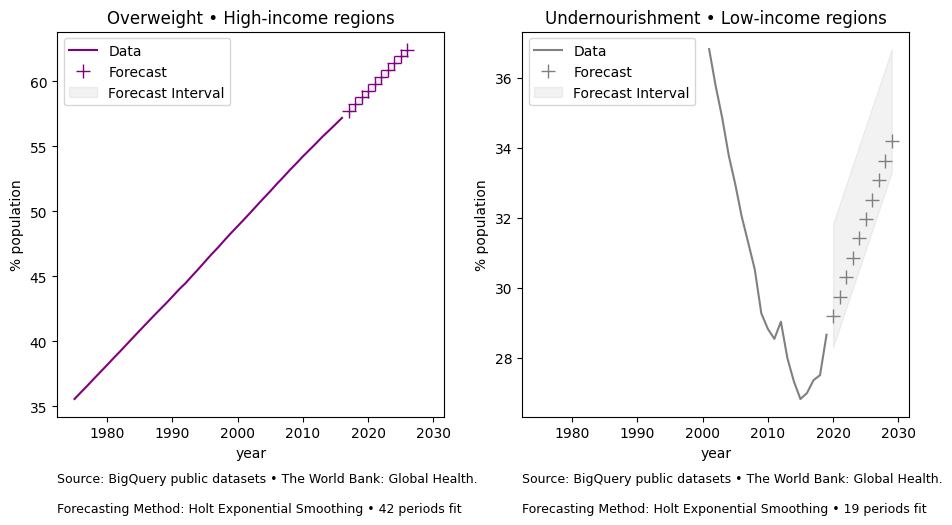

In [12]:
# Generate upper and lower limits
from scipy.stats import norm
limit_high_1 =  norm.ppf(0.95   , m_1, s_1) + df_hes_fcst_1
limit_low_1  =  norm.ppf(0.05   , m_1, s_1) + df_hes_fcst_1
limit_high_2 =  norm.ppf(0.95   , m_2, s_2) + df_hes_fcst_2
limit_low_2  =  norm.ppf(0.00001, m_2, s_2) + df_hes_fcst_2

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(11, 5))

# # Super title
# plt.suptitle('The World Bank: Global Health Data • Forecasting', fontsize=16)

# CHART 1 • Overweight in high-income regions
k = len (ts_overweight_hi)
ax1.set_title('Overweight • High-income regions')
ax1.set_xlabel('year')
ax1.set_ylabel('% population')
ax1.plot(ts_overweight_hi  , color='purple'               , label='Data'    )
ax1.plot(df_hes_fcst_1, '+', color='purple', markersize=10, label='Forecast')
ax1.fill_between(df_hes_fcst_1.index, limit_low_1.iloc[:,0], limit_high_1.iloc[:,0], color='gray', alpha=0.1, label='Forecast Interval')

ax1.annotate('Source: BigQuery public datasets • The World Bank: Global Health.' + '\n\n' + \
             'Forecasting Method: Holt Exponential Smoothing' + ' • ' + str(k) + ' periods fit',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax1.legend()

# CHART 2 • Undernourishment in low-income regions
k = len (ts_undernourishment_pct_li)
ax2.set_title('Undernourishment • Low-income regions')
ax2.set_xlabel('year')
ax2.set_ylabel('% population')
ax2.plot(ts_undernourishment_pct_li, color='gray'               , label='Data'    )
ax2.plot(df_hes_fcst_2, '+'        , color='gray', markersize=10, label='Forecast')
ax2.fill_between(df_hes_fcst_2.index, limit_low_2.iloc[:,0], limit_high_2.iloc[:,0], color='gray', alpha=0.1, label='Forecast Interval')

ax2.annotate('Source: BigQuery public datasets • The World Bank: Global Health.' + '\n\n' + \
             'Forecasting Method: Holt Exponential Smoothing' + ' • ' + str(k) + ' periods fit',
            xy = (0.0, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=9)

ax2.legend(loc='upper left')

plt.show()


<!--
<div style="border: 2px solid #090088; border-radius: 10px; padding: 15px;">

  <p style="font-size: 18px; text-align: center;">If <strong>you have Notebooks on Time Series</strong>, let me know in the comments! &nbsp;<strong>✓</strong></p>

  <p style="font-size: 18px; text-align: center;">If you want to reach, you <strong>find me</strong> on <a href='https://www.linkedin.com/in/isis-santos-costa/'>LinkedIn</a>! </p> <!-- 💬 -->

  <!-- <p style="font-size: 18px; text-align: center;">All the best! </p> <!-- ✨ -->

 <!-- </div> -->

<h6 style="background-color:#03002e; padding:12px; border-radius:8px; color:white; text-align:center; font-weight:bold; font-size:150%; font-style:normal;">
    <strong>Until the next analysis!</strong><br>
    <font style='font-size:55%; font-weight:thin; font-style:italic;'>(yours or mine) (or ours!)</font>
</h6>

[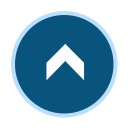](#top)